In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re  
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer   
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from keras.callbacks import EarlyStopping

from itertools import cycle
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import string
import warnings
from collections import Counter
from wordcloud import WordCloud
from xgboost import XGBClassifier

from sklearn.feature_extraction import text
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, GRU, Bidirectional
from tensorflow.keras.models import Sequential


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# File paths
train_file = r"c:\Users\admin\OneDrive\Desktop\capstone-2\train_data.csv"
test_file = r"C:\Users\admin\OneDrive\Desktop\capstone-2\test_data.csv"
hidden_test_file = r"C:\Users\admin\OneDrive\Desktop\capstone-2\test_data_hidden.csv"

In [3]:
# Load datasets
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
hidden_test_data = pd.read_csv(hidden_test_file)

# Data cleaning and preprocessing

In [4]:
train_data.head(2)

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive


In [5]:
train_data.shape

(4000, 8)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [7]:
train_data.isnull().sum()

Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          10
sentiment               0
dtype: int64

In [8]:
# Impute missing values in 'reviews.title' with the mode
mode_title = train_data['reviews.title'].mode()[0]
train_data['reviews.title'].fillna(mode_title, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_9740\2248918738.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['reviews.title'].fillna(mode_title, inplace=True)


In [9]:
train_data.describe()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4000,4000,4000,4000,4000,4000,4000,4000
unique,23,1,23,4,638,3598,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,4000,628,2600,99,4,110,3749


In [10]:
test_data.head(2)

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon


In [11]:
hidden_test_data.head(2)

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive


In [12]:
print(train_data.columns,test_data.columns,hidden_test_data.columns)

Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title',
       'sentiment'],
      dtype='object') Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title'],
      dtype='object') Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title',
       'sentiment'],
      dtype='object')


In [13]:
train_data['reviews.date'] = train_data['reviews.date'].str.split('T').str[0]
test_data['reviews.date'] = test_data['reviews.date'].str.split('T').str[0]
hidden_test_data['reviews.date'] = hidden_test_data['reviews.date'].str.split('T').str[0]

train_data['reviews_day'] = pd.to_datetime(train_data['reviews.date'], format='%Y-%m-%d').dt.day
train_data['reviews_month'] = pd.to_datetime(train_data['reviews.date'], format='%Y-%m-%d').dt.month
train_data['reviews_year'] = pd.to_datetime(train_data['reviews.date'], format='%Y-%m-%d').dt.year

test_data['reviews_day'] = pd.to_datetime(test_data['reviews.date'], format='%Y-%m-%d').dt.day
test_data['reviews_month'] = pd.to_datetime(test_data['reviews.date'], format='%Y-%m-%d').dt.month
test_data['reviews_year'] = pd.to_datetime(test_data['reviews.date'], format='%Y-%m-%d').dt.year

hidden_test_data['reviews_day'] = pd.to_datetime(hidden_test_data['reviews.date'], format='%Y-%m-%d').dt.day
hidden_test_data['reviews_month'] = pd.to_datetime(hidden_test_data['reviews.date'], format='%Y-%m-%d').dt.month
hidden_test_data['reviews_year'] = pd.to_datetime(hidden_test_data['reviews.date'], format='%Y-%m-%d').dt.year

In [14]:
del(train_data['Product Brand'])
del(test_data['Product Brand'])
del(hidden_test_data['Product Brand'])

del(train_data['reviews.date'])
del(test_data['reviews.date'])
del(hidden_test_data['reviews.date'])


In [15]:
print(train_data.dtypes,test_data.dtypes,hidden_test_data.dtypes)

Name of the product    object
categories             object
primaryCategories      object
reviews.text           object
reviews.title          object
sentiment              object
reviews_day             int32
reviews_month           int32
reviews_year            int32
dtype: object Name of the product    object
categories             object
primaryCategories      object
reviews.text           object
reviews.title          object
reviews_day             int32
reviews_month           int32
reviews_year            int32
dtype: object Name of the product    object
categories             object
primaryCategories      object
reviews.text           object
reviews.title          object
sentiment              object
reviews_day             int32
reviews_month           int32
reviews_year            int32
dtype: object


In [16]:
# Combine unique values from train and test_data for encoding
name = list(set(train_data['Name of the product']) | set(test_data['Name of the product']))
categories = list(set(train_data['categories']) | set(test_data['categories']))
primaryCategories = list(train_data['primaryCategories'].unique())

# Initialize LabelEncoders
le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()

# Fit and transform labels
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

# Transform columns in train_data
train_data['Name of the product'] = le_name.transform(train_data['Name of the product'])
train_data['categories'] = le_cat.transform(train_data['categories'])
train_data['primaryCategories'] = le_pri.transform(train_data['primaryCategories'])

# Transform columns in test_data
test_data['Name of the product'] = le_name.transform(test_data['Name of the product'])
test_data['categories'] = le_cat.transform(test_data['categories'])
test_data['primaryCategories'] = le_pri.transform(test_data['primaryCategories'])

# Transform columns in test (assuming similar structure to test_val)
hidden_test_data['Name of the product'] = le_name.transform(hidden_test_data['Name of the product'])
hidden_test_data['categories'] = le_cat.transform(hidden_test_data['categories'])
hidden_test_data['primaryCategories'] = le_pri.transform(hidden_test_data['primaryCategories'])

In [17]:
# Fill missing values in 'reviews.title' column
train_data['reviews.title'].fillna(value=' ', inplace=True)
test_data['reviews.title'].fillna(value=' ', inplace=True)
hidden_test_data['reviews.title'].fillna(value=' ', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_9740\3182827827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['reviews.title'].fillna(value=' ', inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_9740\3182827827.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [18]:
# Print the preprocessed 'reviews.text' and 'reviews.title'
print("Preprocessed 'reviews.text':")
train_data['reviews.text'].head()

Preprocessed 'reviews.text':


0    Purchased on Black FridayPros - Great Price (e...
1    I purchased two Amazon in Echo Plus and two do...
2    Just an average Alexa option. Does show a few ...
3    very good product. Exactly what I wanted, and ...
4    This is the 3rd one I've purchased. I've bough...
Name: reviews.text, dtype: object

In [19]:
print("\nPreprocessed 'reviews.title':")
train_data['reviews.title'].head()


Preprocessed 'reviews.title':


0             Powerful tablet
1    Amazon Echo Plus AWESOME
2                     Average
3                 Greattttttt
4               Very durable!
Name: reviews.title, dtype: object

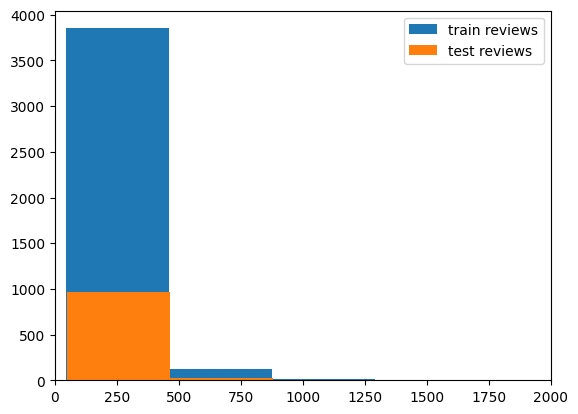

In [20]:
train_len=train_data["reviews.text"].str.len()
test_len=test_data["reviews.text"].str.len()
plt.hist(train_len,bins=20,label="train reviews")
plt.hist(test_len,bins=20,label="test reviews")
plt.legend()
plt.xlim(0,2000)
plt.show()

The plot shows a significant number of short reviews, particularly in the train dataset. The distribution appears to be right-skewed with a long tail, indicating a small number of longer reviews. The test set follows a similar pattern but with fewer reviews overall.


### Normalize text data

In [21]:
from contractions import contractions_dict

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to expand contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')
    return pattern.sub(lambda x: contractions_dict[x.group()], text)

# Sample DataFrame structure
data = {
    'reviews.text': ["I love this product! It's amazing.", "This product is not good. Very bad quality."],
    'reviews.title': ["Great product", "Bad quality"],
    'sentiment': [1, 0]
}

df = pd.DataFrame(data)

# Function for text normalization
def normalize_text(text):
    text = expand_contractions(text)  # Expand contractions
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Function for tokenization and stemming
def tokenize_and_stem(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]  # Stemming
    return ' '.join(tokens)

# Function for tokenization and lemmatization
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  # Lemmatization
    return ' '.join(tokens)

# Apply normalization
df['reviews.text_cleaned'] = df['reviews.text'].apply(normalize_text)
df['reviews.title_cleaned'] = df['reviews.title'].apply(normalize_text)

# Apply tokenization and stemming/lemmatization
df['reviews.text_stemmed'] = df['reviews.text_cleaned'].apply(tokenize_and_stem)
df['reviews.text_lemmatized'] = df['reviews.text_cleaned'].apply(tokenize_and_lemmatize)
df['reviews.title_stemmed'] = df['reviews.title_cleaned'].apply(tokenize_and_stem)
df['reviews.title_lemmatized'] = df['reviews.title_cleaned'].apply(tokenize_and_lemmatize)

df.head()

,reviews.text,reviews.title,sentiment,reviews.text_cleaned,reviews.title_cleaned,reviews.text_stemmed,reviews.text_lemmatized,reviews.title_stemmed,reviews.title_lemmatized
0,I love this product! It's amazing.,Great product,1,i love this product its amazing,great product,love product amaz,love product amazing,great product,great product
1,This product is not good. Very bad quality.,Bad quality,0,this product is not good very bad quality,bad quality,product good bad qualiti,product good bad quality,bad qualiti,bad quality


# Exploratory Data Analysis (EDA):

In [22]:
# Summary statistics
print("Summary Statistics:")
train_data.describe()


Summary Statistics:


,Name of the product,categories,primaryCategories,reviews_day,reviews_month,reviews_year
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,10.335750,8.565750,0.466250,15.753250,6.011250,2016.85225
std,6.019392,5.324262,0.770396,8.617826,4.375775,0.67382
min,0.000000,0.000000,0.000000,1.000000,1.000000,2014.00000
25%,5.000000,6.000000,0.000000,8.000000,2.000000,2016.00000
50%,9.000000,9.000000,0.000000,16.000000,5.000000,2017.00000
75%,16.000000,11.000000,1.000000,23.000000,11.000000,2017.00000
max,22.000000,22.000000,3.000000,31.000000,12.000000,2018.00000


In [23]:
# Count the occurrences of each sentiment category
sentiment_counts = train_data['sentiment'].value_counts()

# Calculate the percentage of each sentiment category
sentiment_percentage = sentiment_counts / sentiment_counts.sum() * 100

# Print the sentiment counts and percentages
print("Sentiment Counts:\n", sentiment_counts)
print("\nSentiment Percentage:\n", sentiment_percentage)

Sentiment Counts:
 sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64

Sentiment Percentage:
 sentiment
Positive    93.725
Neutral      3.950
Negative     2.325
Name: count, dtype: float64


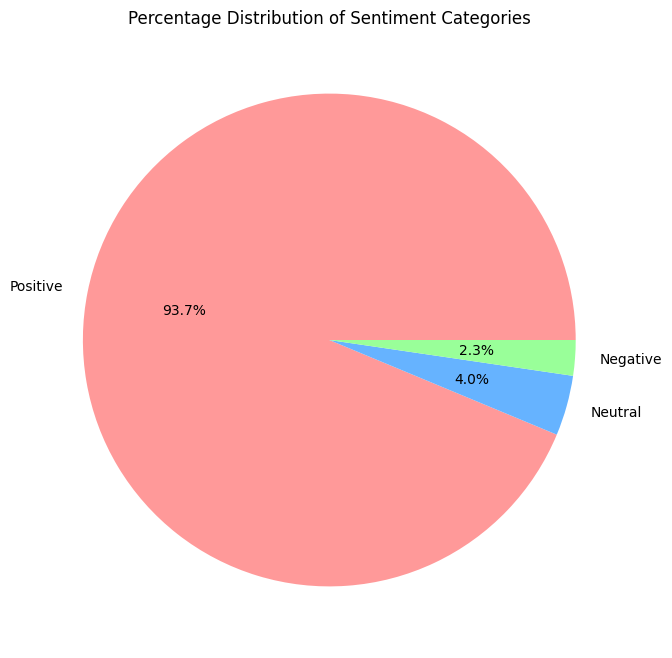

In [25]:
# Define a custom color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Assuming sentiment_percentage is a pandas Series with sentiment labels as index and their percentages as values
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentage, labels=sentiment_percentage.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage Distribution of Sentiment Categories')
plt.show()


The plot indicates a significant class imbalance, with the majority of the reviews being Positive. This imbalance can impact the performance of your sentiment analysis models, as they may become biased towards the majority class.

In [25]:

#all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train_data['reviews.text'][train_data['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train_data['reviews.text'][train_data['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train_data['reviews.text'][train_data['sentiment']=='Neutral']])

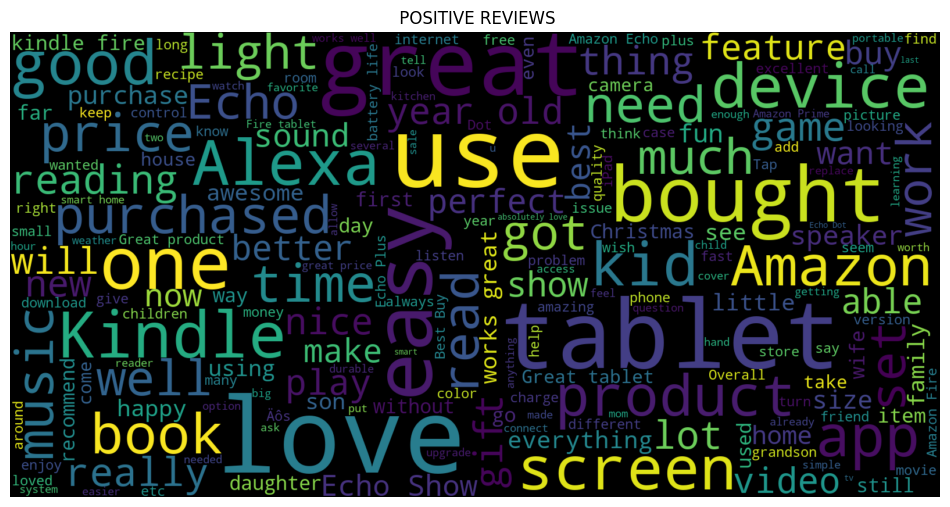

In [26]:
wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

This word cloud visualization represents the most frequent words in positive reviews from your dataset.

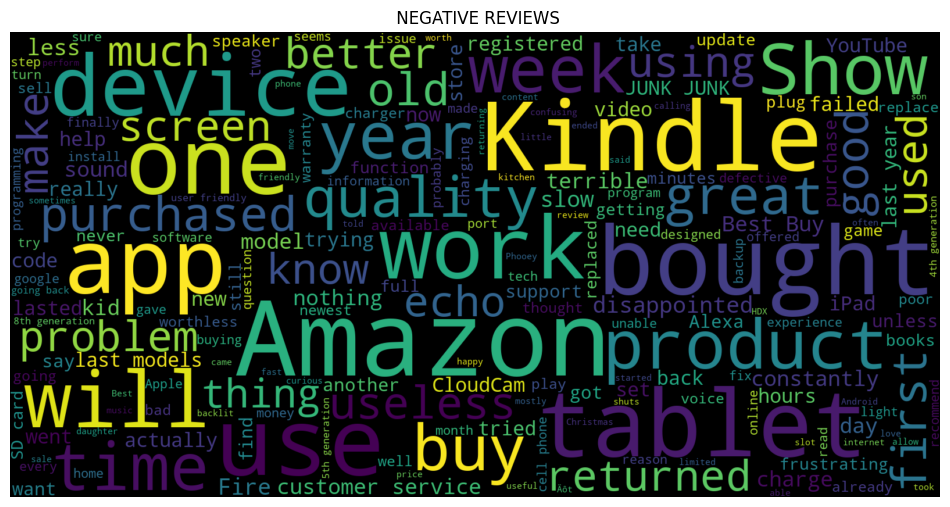

In [27]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

This word cloud visualization represents the most frequent words in negetive reviews from your dataset.

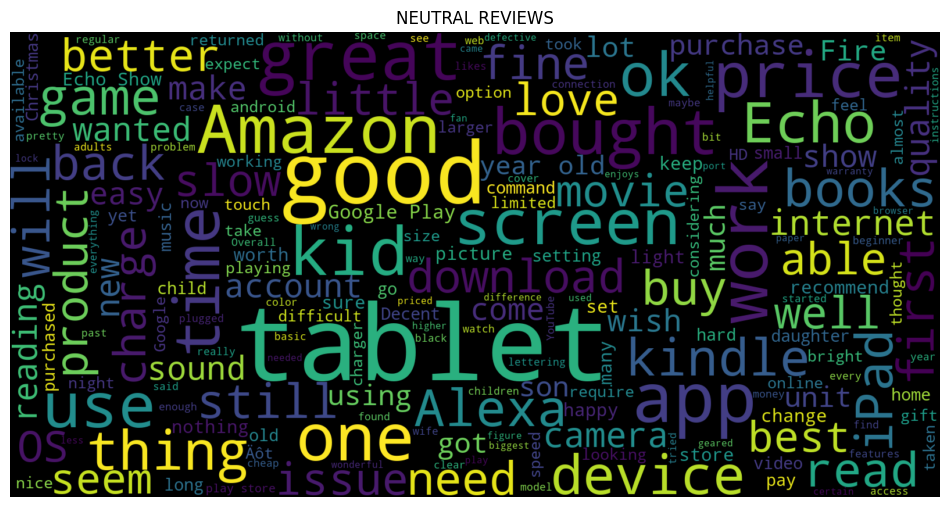

In [28]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

This word cloud visualization represents the most frequent words in neutral reviews from your dataset.

C:\Users\admin\AppData\Local\Temp\ipykernel_380\178224859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


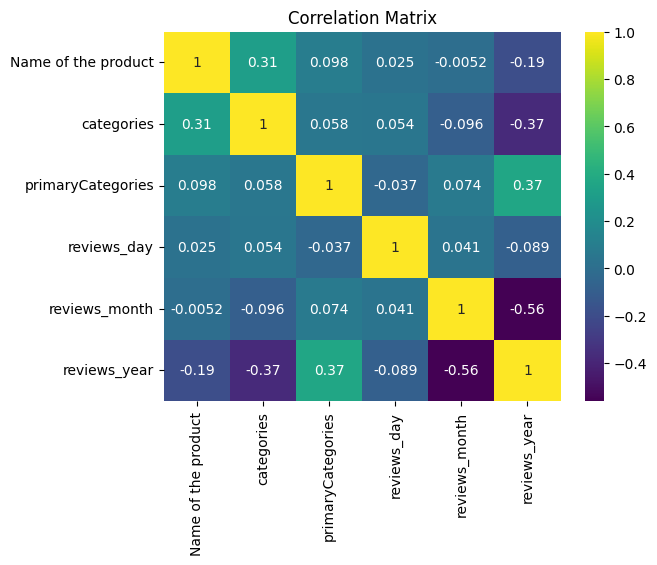

In [29]:
# Correlation matrix
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [30]:
le_senti = LabelEncoder()
train_data['sentiment'] = le_senti.fit_transform(train_data['sentiment'])
hidden_test_data['sentiment'] = le_senti.fit_transform(hidden_test_data['sentiment'])

### Feature enginering

In [31]:
# Convert list-like text data to strings
train_data['reviews.text'] = train_data['reviews.text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
test_data['reviews.text'] = test_data['reviews.text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
hidden_test_data['reviews.text'] = hidden_test_data['reviews.text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

## TF-IDF Vectorizer

In [32]:
# Combine reviews.text and reviews.title into a single text field, overwriting reviews.text
train_data['reviews.text'] = train_data['reviews.title'].fillna('') + ' ' + train_data['reviews.text'].fillna('')
test_data['reviews.text'] = test_data['reviews.title'].fillna('') + ' ' + test_data['reviews.text'].fillna('')
hidden_test_data['reviews.text'] = hidden_test_data['reviews.title'].fillna('') + ' ' + hidden_test_data['reviews.text'].fillna('')


# Ensure 'sentiment' column is present in test_data
if 'sentiment' not in test_data.columns:
    test_data['sentiment'] = None  # or use a placeholder value like '' or -1

In [33]:
# Set up the TF-IDF vectorizer with custom tokenization and stemming/lemmatization:

# Initialize the stemmer
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# Custom tokenizer with stemming
def custom_tokenizer(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(token) for token in tokens if token not in stop_words]

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

In [34]:
# Fit the vectorizer on the training data and transform the data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['reviews.text'])

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(test_data['reviews.text'])
X_hidden_test_tfidf = tfidf_vectorizer.transform(hidden_test_data['reviews.text'])


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Multinomial Naive Bayes Classifier

In [35]:
# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, train_data['sentiment'])

MultinomialNB()

In [36]:
# Predict on the hidden test data
y_hidden_test_pred = nb_classifier.predict(X_hidden_test_tfidf)

# Evaluate on hidden test data
print("Hidden Test Data Evaluation")
print("Accuracy:", accuracy_score(hidden_test_data['sentiment'], y_hidden_test_pred))
print("Classification Report:")
print(classification_report(hidden_test_data['sentiment'], y_hidden_test_pred))
print(confusion_matrix(hidden_test_data['sentiment'], y_hidden_test_pred))


Hidden Test Data Evaluation
Accuracy: 0.937
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000

[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [37]:
# Assuming sentiments are labeled as 0, 1, 2 for classes
y_hidden_test_bin = label_binarize(hidden_test_data['sentiment'], classes=[0, 1, 2])
y_hidden_test_pred_bin = label_binarize(y_hidden_test_pred, classes=[0, 1, 2])

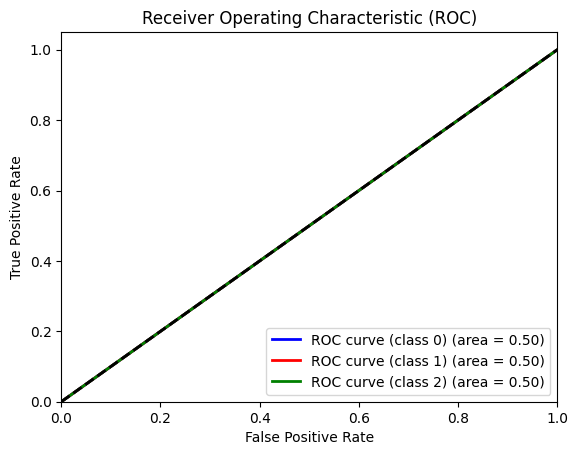

In [38]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_hidden_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_hidden_test_bin[:, i], y_hidden_test_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i in range(y_hidden_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [39]:
# Predict on the test data
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Append predictions to test_data
test_data['predicted_sentiment'] = y_test_pred

# Save the predictions to a CSV file for manual checking
test_data.to_csv('C:/Users/admin/OneDrive/Desktop/capstone-2/test_data_with_predictions.csv', index=False)
test_data.head(2)

,Name of the product,categories,primaryCategories,reviews.text,reviews.title,reviews_day,reviews_month,reviews_year,sentiment,predicted_sentiment
0,19,11,0,very handy device Amazon kindle fire has a lot...,very handy device,23,5,2016,None,2
1,9,6,1,Another winner from Amazon The Echo Show is a ...,Another winner from Amazon,2,1,2018,None,2


### Tackling Class Imbalance and Evaluation Metrics 

In [40]:
# Separate the majority and minority classes
majority_class = train_data[train_data['sentiment'] == train_data['sentiment'].value_counts().idxmax()]
minority_class = train_data[train_data['sentiment'] != train_data['sentiment'].value_counts().idxmax()]

In [41]:
train_data.sentiment.value_counts()

2    3749
1     158
0      93
Name: sentiment, dtype: int64

In [42]:
count_2, count_1, count_0 =train_data.sentiment.value_counts()
class_2 = train_data[train_data.sentiment==2]
class_1 = train_data[train_data.sentiment==1]
class_0 = train_data[train_data.sentiment==0]

## Undersampling 

In [43]:
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(409, 9)
2    158
1    158
0     93
Name: sentiment, dtype: int64


In [44]:
# Reset index for train_data and hidden_test_data
train_data = train_data.reset_index(drop=True)
hidden_test_data = hidden_test_data.reset_index(drop=True)

In [45]:
# Initialize the TfidfVectorizers
tvec_text = TfidfVectorizer()
tvec_title = TfidfVectorizer()

# Fit and transform 'reviews.text' and 'reviews.title' on combined data
combi_text = train_data['reviews.text'].append(hidden_test_data['reviews.text'], ignore_index=True)
tvec_text.fit(combi_text)
tvec_text_train = tvec_text.transform(train_data['reviews.text'])
tvec_text_hidden_test = tvec_text.transform(hidden_test_data['reviews.text'])

combi_title = train_data['reviews.title'].append(hidden_test_data['reviews.title'], ignore_index=True)
tvec_title.fit(combi_title)
tvec_title_train = tvec_title.transform(train_data['reviews.title'])
tvec_title_hidden_test = tvec_title.transform(hidden_test_data['reviews.title'])


C:\Users\admin\AppData\Local\Temp\ipykernel_380\2246807505.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi_text = train_data['reviews.text'].append(hidden_test_data['reviews.text'], ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_380\2246807505.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi_title = train_data['reviews.title'].append(hidden_test_data['reviews.title'], ignore_index=True)


In [46]:
# Combine transformed text and title data with other features
X_train = pd.concat([
    train_data.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1),
    pd.DataFrame(tvec_text_train.toarray()),
    pd.DataFrame(tvec_title_train.toarray())
], axis=1)

X_hidden_test = pd.concat([
    hidden_test_data.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1),
    pd.DataFrame(tvec_text_hidden_test.toarray()),
    pd.DataFrame(tvec_title_hidden_test.toarray())
], axis=1)

y_train = train_data['sentiment']
y_hidden_test = hidden_test_data['sentiment']

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_hidden_test.columns = X_hidden_test.columns.astype(str)

In [47]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the hidden test set
y_pred = model.predict(X_hidden_test_tfidf)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_true=y_hidden_test, y_pred=y_pred))
print("\nClassification Report:\n", classification_report(y_true=y_hidden_test, y_pred=y_pred))
print("\nAccuracy: ", accuracy_score(y_hidden_test, y_pred) * 100)

Confusion Matrix:
 [[  1   0  23]
 [  0   3  36]
 [  0   0 937]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       1.00      0.08      0.14        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.98      0.37      0.40      1000
weighted avg       0.94      0.94      0.92      1000


Accuracy:  94.1


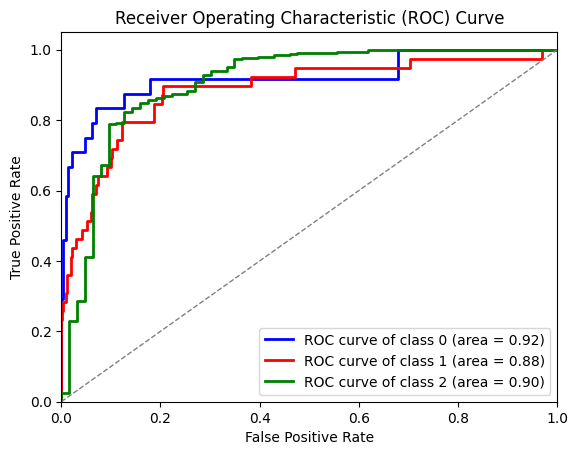

In [48]:
y_pred_proba = model.predict_proba(X_hidden_test_tfidf)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_hidden_test, y_pred_proba[:, i], pos_label=model.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green']  # Adjust according to the number of classes
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(model.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## oversampled

In [49]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

(11247, 9)
2    3749
0    3749
1    3749
Name: sentiment, dtype: int64


In [50]:
# Reset index
train_data = train_data.reset_index(drop=True)
hidden_test_data = hidden_test_data.reset_index(drop=True)

# Initialize TF-IDF Vectorizer for text and title separately
tvec_text = TfidfVectorizer(max_features=5000)
tvec_title = TfidfVectorizer(max_features=5000)

# Fit and transform on train_data
tvec_text.fit(train_data['reviews.text'])
tvec_text_train = pd.DataFrame(tvec_text.transform(train_data['reviews.text']).toarray())
tvec_text_hidden = pd.DataFrame(tvec_text.transform(hidden_test_data['reviews.text']).toarray())

tvec_title.fit(train_data['reviews.title'])
tvec_title_train = pd.DataFrame(tvec_title.transform(train_data['reviews.title']).toarray())
tvec_title_hidden = pd.DataFrame(tvec_title.transform(hidden_test_data['reviews.title']).toarray())

# Concatenate transformed features with other columns
Train = pd.concat([train_data.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1), tvec_text_train, tvec_title_train], axis=1)
Test_Val = pd.concat([hidden_test_data.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1), tvec_text_hidden, tvec_title_hidden], axis=1)

In [51]:
# Prepare data for training
x_train = Train.values
y_train = train_data['sentiment'].values
x_val = Test_Val.values
y_val = hidden_test_data['sentiment'].values


In [52]:
# Initialize Logistic Regression model
lr = LogisticRegression()

# Fit the model on training data
lr.fit(x_train, y_train)

# Predict on validation data
y_pred = lr.predict(x_val)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print("\nClassification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))


Confusion Matrix:
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000

Accuracy: 0.937


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.p

ROC-AUC Score: 0.5


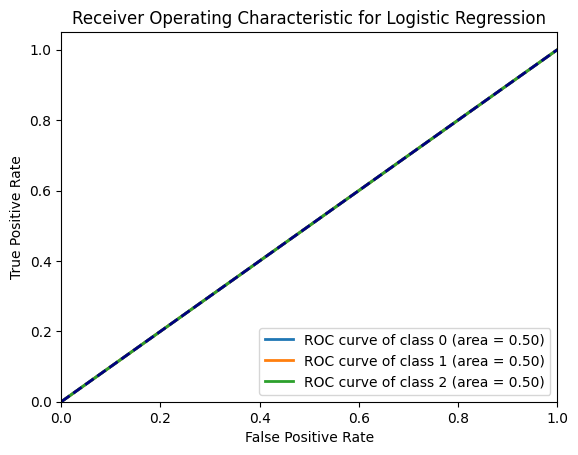

In [53]:
# Prepare for ROC-AUC score
lb = LabelBinarizer()
lb.fit(y_val)
y_val_bin = lb.transform(y_val)
y_pred_bin = lb.transform(y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val_bin, y_pred_bin, average='weighted')
print('ROC-AUC Score:', roc_auc)

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes (0, 1, 2)
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Model Selection and Advanced Techniques

In [54]:
# Reset index
train_data = train_data.reset_index(drop=True)
hidden_test_data = hidden_test_data.reset_index(drop=True)

# Initialize TF-IDF Vectorizer for text and title separately
tvec_text = TfidfVectorizer(max_features=5000)
tvec_title = TfidfVectorizer(max_features=2000)

# Fit and transform on train_data
tvec_text.fit(train_data['reviews.text'])
tvec_text_train = pd.DataFrame(tvec_text.transform(train_data['reviews.text']).toarray())
tvec_text_hidden = pd.DataFrame(tvec_text.transform(hidden_test_data['reviews.text']).toarray())

tvec_title.fit(train_data['reviews.title'])
tvec_title_train = pd.DataFrame(tvec_title.transform(train_data['reviews.title']).toarray())
tvec_title_hidden = pd.DataFrame(tvec_title.transform(hidden_test_data['reviews.title']).toarray())

# Concatenate transformed features with other columns
Train = pd.concat([train_data.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1), tvec_text_train, tvec_title_train], axis=1)
Test_Val = pd.concat([hidden_test_data.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1), tvec_text_hidden, tvec_title_hidden], axis=1)


### multi-class Support Vector Machines 

In [55]:
# Prepare data for training
x_train = Train.values
y_train = train_data['sentiment'].values
x_val = Test_Val.values
y_val = hidden_test_data['sentiment'].values

# Initialize and train SVM model
svm_model = SVC(probability=True, kernel='linear')
svm_model.fit(x_train, y_train)

# Predict on validation data
y_pred = svm_model.predict(x_val)
y_pred_proba = svm_model.predict_proba(x_val)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print("\nClassification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))

Confusion Matrix:
[[  9   2  13]
 [  5   8  26]
 [  0   3 934]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.38      0.47        24
           1       0.62      0.21      0.31        39
           2       0.96      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.74      0.53      0.59      1000
weighted avg       0.94      0.95      0.94      1000

Accuracy: 0.951


SVM ROC-AUC Score: 0.6853132582505375


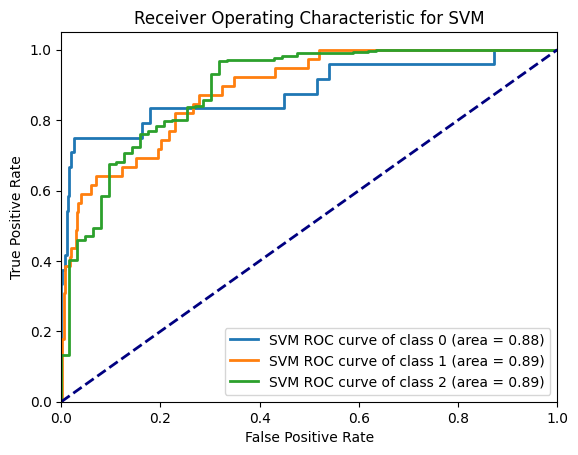

In [56]:
# ROC-AUC Score for SVM
lb = LabelBinarizer()
lb.fit(y_val)
y_val_bin = lb.transform(y_val)
y_pred_bin_svm = lb.transform(y_pred)

roc_auc_svm = roc_auc_score(y_val_bin, y_pred_bin_svm, average='weighted')
print('SVM ROC-AUC Score:', roc_auc_svm)

# Plot ROC curves for SVM
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(3):  # Assuming 3 classes
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_val_bin[:, i], y_pred_proba[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

plt.figure()
lw = 2
for i in range(3):
    plt.plot(fpr_svm[i], tpr_svm[i], lw=lw, label=f'SVM ROC curve of class {i} (area = {roc_auc_svm[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

### Neural Network with Keras

In [57]:
from tensorflow.keras.utils import to_categorical

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert labels to categorical one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)

# Define the model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Train the model
model.fit(X_train, y_train_cat,
          epochs=10,
          batch_size=64,
          validation_data=(X_val, y_val_cat))

# Evaluate the model
score = model.evaluate(X_val, y_val_cat, verbose=0)
print(f'Neural Network Accuracy: {score[1]*100}')

# Predict probabilities on validation data
y_pred_nn_proba = model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred_nn = np.argmax(y_pred_nn_proba, axis=1)

# Print evaluation metrics
print("Neural Network Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred_nn))
print("\nNeural Network Classification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred_nn))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.8485 - loss: 13.2683 - val_accuracy: 0.9388 - val_loss: 2.0021
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8881 - loss: 2.2957 - val_accuracy: 0.9388 - val_loss: 0.2933
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8787 - loss: 0.8253 - val_accuracy: 0.9388 - val_loss: 0.5084
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8916 - loss: 0.6053 - val_accuracy: 0.9388 - val_loss: 0.4103
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9244 - loss: 0.4132 - val_accuracy: 0.9388 - val_loss: 0.4377
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9236 - loss: 0.4002 - val_accuracy: 0.9388 - val_loss: 0.3596
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9290 - loss: 0.3667 - val_accuracy: 0.9388 - val_loss: 0.3116
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9368 - loss: 0.3518 - val_accuracy: 0.9388 - 

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Neural Network ROC-AUC Score: 0.6074238194557678


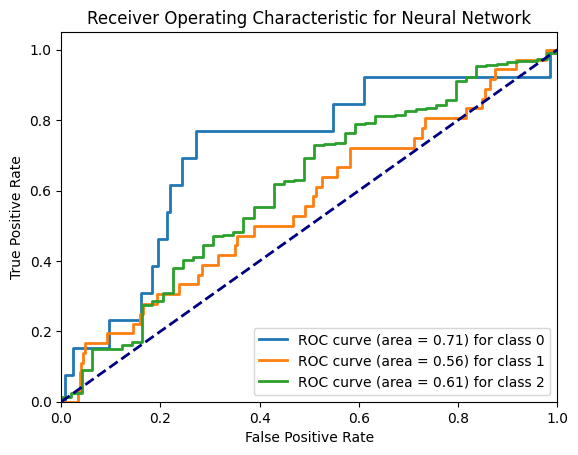

In [59]:
# Compute ROC-AUC score
lb = LabelBinarizer()
y_val_bin = lb.fit_transform(y_val)
roc_auc_nn = roc_auc_score(y_val_bin, y_pred_nn_proba, average='weighted')
print('Neural Network ROC-AUC Score:', roc_auc_nn)

# Compute ROC curve and ROC-AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_nn_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
lw = 2
for i in range(3):  # Assuming 3 classes
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()

## Ensemble Techniques:

In [60]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Function to calculate sentiment scores using VADER
def calculate_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores['compound']  # Using compound score as the overall sentiment score

# Sample data preprocessing steps (ensure 'reviews.text' is combined as required)
train_data['reviews.text'] = train_data['reviews.title'].fillna('') + ' ' + train_data['reviews.text'].fillna('')
test_data['reviews.text'] = test_data['reviews.title'].fillna('') + ' ' + test_data['reviews.text'].fillna('')
hidden_test_data['reviews.text'] = hidden_test_data['reviews.title'].fillna('') + ' ' + hidden_test_data['reviews.text'].fillna('')

# Ensure 'sentiment' column is present in test_data
if 'sentiment' not in test_data.columns:
    test_data['sentiment'] = None  # or use a placeholder value like '' or -1

# Initialize the stemmer
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# Custom tokenizer with stemming
def custom_tokenizer(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(token) for token in tokens if token not in stop_words]

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['reviews.text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['reviews.text'])
X_hidden_test_tfidf = tfidf_vectorizer.transform(hidden_test_data['reviews.text'])


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [61]:
# Oversample the Training Data using SMOTE:
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, train_data['sentiment'])

## Multinomial Naive Bayes:

In [62]:
# Train Multinomial Naive Bayes on oversampled data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf_resampled, y_train_resampled)

# Predict on hidden test data
y_hidden_test_pred_nb = nb_classifier.predict(X_hidden_test_tfidf)

# Evaluate the model
print("Multinomial Naive Bayes - Hidden Test Data Evaluation")
print("Accuracy:", accuracy_score(hidden_test_data['sentiment'], y_hidden_test_pred_nb))
print("Classification Report:")
print(classification_report(hidden_test_data['sentiment'], y_hidden_test_pred_nb))

# Binarize the sentiment labels for multi-class problem
y_hidden_test_bin = label_binarize(hidden_test_data['sentiment'], classes=[0, 1, 2])
y_hidden_test_pred_bin_nb = label_binarize(y_hidden_test_pred_nb, classes=[0, 1, 2])


Multinomial Naive Bayes - Hidden Test Data Evaluation
Accuracy: 0.878
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.46      0.35        24
           1       0.19      0.46      0.27        39
           2       0.98      0.91      0.94       937

    accuracy                           0.88      1000
   macro avg       0.49      0.61      0.52      1000
weighted avg       0.93      0.88      0.90      1000



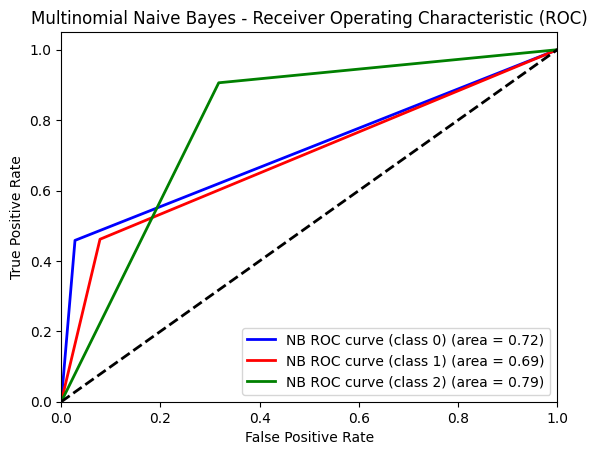

In [63]:
# Compute ROC curve and ROC area for each class for Multinomial Naive Bayes
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(y_hidden_test_bin.shape[1]):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_hidden_test_bin[:, i], y_hidden_test_pred_bin_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Plotting the ROC curves for Multinomial Naive Bayes
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(y_hidden_test_bin.shape[1]), colors):
    plt.plot(fpr_nb[i], tpr_nb[i], color=color, lw=2,
             label=f'NB ROC curve (class {i}) (area = {roc_auc_nb[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial Naive Bayes - Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## XGBoost

In [64]:
# Train XGBoost on original data
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train_tfidf, train_data['sentiment'])

# Predict on hidden test data
y_hidden_test_pred_xgb = xgb_classifier.predict(X_hidden_test_tfidf)

# Evaluate the model
print("XGBoost - Hidden Test Data Evaluation")
print("Accuracy:", accuracy_score(hidden_test_data['sentiment'], y_hidden_test_pred_xgb))
print("Classification Report:")
print(classification_report(hidden_test_data['sentiment'], y_hidden_test_pred_xgb))

# Binarize the sentiment labels for multi-class problem
y_hidden_test_pred_bin_xgb = label_binarize(y_hidden_test_pred_xgb, classes=[0, 1, 2])

XGBoost - Hidden Test Data Evaluation
Accuracy: 0.957
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.46      0.59        24
           1       0.72      0.33      0.46        39
           2       0.96      1.00      0.98       937

    accuracy                           0.96      1000
   macro avg       0.84      0.60      0.68      1000
weighted avg       0.95      0.96      0.95      1000



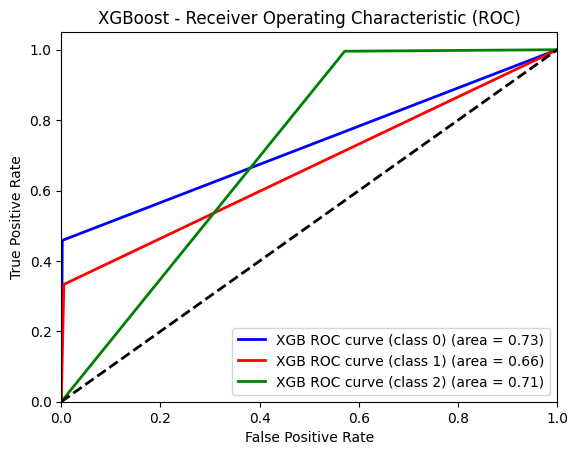

In [65]:
# Compute ROC curve and ROC area for each class for XGBoost
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(y_hidden_test_bin.shape[1]):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_hidden_test_bin[:, i], y_hidden_test_pred_bin_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plotting the ROC curves for XGBoost
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(y_hidden_test_bin.shape[1]), colors):
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=2,
             label=f'XGB ROC curve (class {i}) (area = {roc_auc_xgb[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Long Short-Term Memory (LSTM) Implementation with Class Weights and Optimization

In [66]:
# Extract features and labels from the training data
X_train_text = train_data['reviews.text'].values
y_train = train_data['sentiment'].values

# Tokenization parameters
top_words = 5000  # Vocabulary size
max_review_length = 500  # Max length of each review
embedding_vector_length = 32  # Length of the embedding vector
dropout_rate = 0.5  # Dropout rate
num_classes = 3  # Number of sentiment classes

# Data Preprocessing
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_review_length)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

# Convert labels to categorical one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

In [67]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, ))
model.add(LSTM(100, dropout=dropout_rate, recurrent_dropout=dropout_rate))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat,
          epochs=10,
          batch_size=64,
          validation_data=(X_val, y_val_cat))

# Evaluate the model
score = model.evaluate(X_val, y_val_cat, verbose=0)
print(f'LSTM Model Accuracy: {score[1]*100:.2f}%')

# Predict probabilities on validation data
y_pred_lstm_proba = model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred_lstm = np.argmax(y_pred_lstm_proba, axis=1)

# Print evaluation metrics
print("LSTM Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred_lstm))
print("\nLSTM Classification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred_lstm))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 731ms/step - accuracy: 0.8797 - loss: 0.7086 - val_accuracy: 0.9388 - val_loss: 0.2727
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 718ms/step - accuracy: 0.9431 - loss: 0.2556 - val_accuracy: 0.9388 - val_loss: 0.2697
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 740ms/step - accuracy: 0.9412 - loss: 0.2570 - val_accuracy: 0.9388 - val_loss: 0.2656
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 730ms/step - accuracy: 0.9341 - loss: 0.2672 - val_accuracy: 0.9388 - val_loss: 0.2577
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 730ms/step - accuracy: 0.9310 - loss: 0.2425 - val_accuracy: 0.9388 - val_loss: 0.2355
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 743ms/step - accuracy: 0.9405 - loss: 0.1787 - val_accuracy: 0.9413 - val_loss: 0.2315
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 720ms/step - accuracy: 0.9487 - loss: 0.1420 - val_accuracy: 0.9413 - val_loss: 0.2294
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 741ms/step - accuracy: 0.9426 - loss: 0.1349 - val_accu

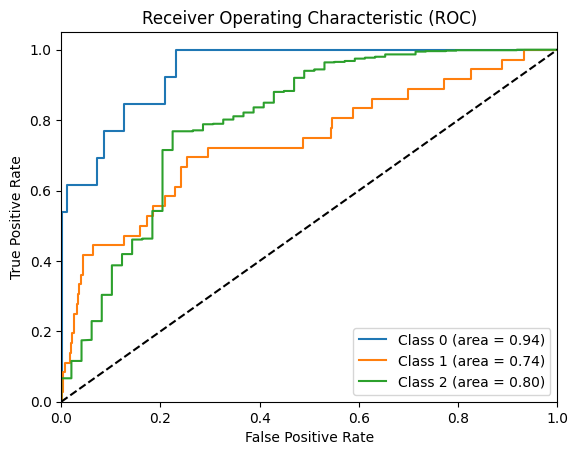

In [68]:
# Compute ROC curve and ROC area for each class
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_lstm_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC-AUC curve
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Gated Recurrent Units (GRUs)

In [69]:
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Define the GRU model
def create_gru_model(top_words, embedding_vector_length, num_classes, dropout_rate):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length))
    model.add(GRU(100, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize model parameters
top_words = 10000  # Number of words in the vocabulary
embedding_vector_length = 100
num_classes = 3  # Number of sentiment classes
dropout_rate = 0.5

# Create and compile the GRU model
gru_model = create_gru_model(top_words, embedding_vector_length, num_classes, dropout_rate)

# Train the model
gru_model.fit(X_train, y_train_cat,
              epochs=10,
              batch_size=64,
              validation_data=(X_val, y_val_cat))

# Evaluate the model
score = gru_model.evaluate(X_val, y_val_cat, verbose=0)
print(f'GRU Model Accuracy: {score[1]*100:.2f}%')

# Predict probabilities on validation data
y_pred_gru_proba = gru_model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred_gru = np.argmax(y_pred_gru_proba, axis=1)

# Print evaluation metrics
print("GRU Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred_gru))
print("\nGRU Classification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred_gru))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.0244 - loss: nan - val_accuracy: 0.0162 - val_loss: nan
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.0252 - loss: nan - val_accuracy: 0.0162 - val_loss: nan
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 970ms/step - accuracy: 0.0255 - loss: nan - val_accuracy: 0.0162 - val_loss: nan
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 912ms/step - accuracy: 0.0273 - loss: nan - val_accuracy: 0.0162 - val_loss: nan
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.0208 - loss: nan - val_accuracy: 0.0162 - val_loss: nan
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.0275 - loss: nan - val_accuracy: 0.0162 - val_loss: nan
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.0272 - loss: nan - val_accuracy: 0.0162 - val_loss: nan
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.0224 - loss: nan - val_accuracy: 0.0162 - val_loss: nan
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [70]:
y_pred_gru_proba = np.nan_to_num(y_pred_gru_proba)

# Remove samples with NaN labels (if applicable)
valid_indices = ~np.isnan(y_val)
y_val = y_val[valid_indices]
y_pred_gru_proba = y_pred_gru_proba[valid_indices]

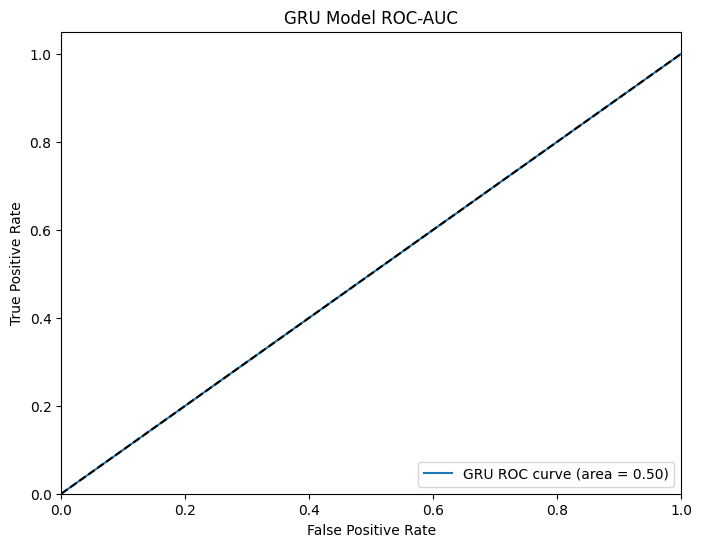

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize predicted probabilities
y_pred_gru_proba_bin = label_binarize(np.argmax(y_pred_gru_proba, axis=1), classes=[0, 1, 2])

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val_bin.ravel(), y_pred_gru_proba.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GRU ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GRU Model ROC-AUC')
plt.legend(loc='lower right')
plt.show()


### Optimization:

In [81]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import confusion_matrix, classification_report

# Define LSTM model with hyperparameters
def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=hp.Int('top_words', min_value=5000, max_value=10000, step=5000),
                        output_dim=hp.Int('embedding_vector_length', min_value=32, max_value=128, step=32)))
    model.add(LSTM(hp.Int('lstm_units', min_value=50, max_value=150, step=50),
                   dropout=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1),
                   recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare data
X_train_text = train_data['reviews.text'].values
y_train = train_data['sentiment'].values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_padded = pad_sequences(X_train_seq, maxlen=500)
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)

# Define and run the hyperparameter search
tuner = RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='lstm_project'
)
tuner.search(X_train, y_train_cat, epochs=10, validation_data=(X_val, y_val_cat))

# Get the best model and evaluate
best_model = tuner.get_best_models(num_models=1)[0]
score_lstm = best_model.evaluate(X_val, y_val_cat, verbose=0)
print(f'Optimized LSTM Model Accuracy: {score_lstm[1]*100:.2f}%')
y_pred_lstm = np.argmax(best_model.predict(X_val), axis=1)
print("Optimized LSTM Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred_lstm))
print("\nOptimized LSTM Classification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred_lstm))


Trial 10 Complete [00h 05m 56s]
val_accuracy: 0.9524999856948853

Best val_accuracy So Far: 0.9524999856948853
Total elapsed time: 01h 43m 18s


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Optimized LSTM Model Accuracy: 95.25%
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step
Optimized LSTM Confusion Matrix:
[[  7   0   6]
 [  0   5  31]
 [  0   1 750]]

Optimized LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.83      0.14      0.24        36
           2       0.95      1.00      0.98       751

    accuracy                           0.95       800
   macro avg       0.93      0.56      0.64       800
weighted avg       0.95      0.95      0.94       800



In [87]:
# Prepare data
top_words = 5000
max_review_length = 500
embedding_vector_length = 32
dropout_rate = 0.5
num_classes = 3

X_train_text = train_data['reviews.text'].values
y_train = train_data['sentiment'].values
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_review_length)
y_train_cat = to_categorical(y_train, num_classes=num_classes)

# Subset data for faster experimentation
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_padded, y_train_cat, test_size=0.8, random_state=42)

# Perform cross-validation for LSTM
kf = KFold(n_splits=3, shuffle=True, random_state=42)
lstm_scores = []

for train_index, val_index in kf.split(X_train_subset):
    X_train_cv, X_val_cv = X_train_subset[train_index], X_train_subset[val_index]
    y_train_cv, y_val_cv = y_train_subset[train_index], y_train_subset[val_index]

    # Instantiate and fit the LSTM model
    lstm_wrapper = KerasClassifierWrapper(build_fn=lambda: create_lstm_model(embedding_vector_length, dropout_rate, num_classes, lstm_units=100))
    lstm_wrapper.fit(X_train_cv, y_train_cv)

    # Evaluate the model
    score_lstm = lstm_wrapper.score(X_val_cv, y_val_cv)
    lstm_scores.append(score_lstm)
    print(f'Fold LSTM Model Accuracy: {score_lstm*100:.2f}%')
    y_pred_lstm = lstm_wrapper.predict(X_val_cv)
    print("Fold LSTM Confusion Matrix:")
    print(confusion_matrix(y_true=y_val_cv.argmax(axis=1), y_pred=y_pred_lstm))
    print("\nFold LSTM Classification Report:")
    print(classification_report(y_true=y_val_cv.argmax(axis=1), y_pred=y_pred_lstm))

print(f'Average LSTM Model Accuracy: {np.mean(lstm_scores)*100:.2f}%')

# Check GPU availability (optional)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Fold LSTM Model Accuracy: 91.01%
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step
Fold LSTM Confusion Matrix:
[[  0   0   7]
 [  0   0  17]
 [  0   0 243]]

Fold LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        17
           2       0.91      1.00      0.95       243

    accuracy                           0.91       267
   macro avg       0.30      0.33      0.32       267
weighted avg       0.83      0.91      0.87       267



c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Fold LSTM Model Accuracy: 96.25%
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step
Fold LSTM Confusion Matrix:
[[  0   0   5]
 [  0   0   5]
 [  0   0 257]]

Fold LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.96      1.00      0.98       257

    accuracy                           0.96       267
   macro avg       0.32      0.33      0.33       267
weighted avg       0.93      0.96      0.94       267



c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Fold LSTM Model Accuracy: 93.98%
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step
Fold LSTM Confusion Matrix:
[[  0   0   6]
 [  0   0  10]
 [  0   0 250]]

Fold LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        10
           2       0.94      1.00      0.97       250

    accuracy                           0.94       266
   macro avg       0.31      0.33      0.32       266
weighted avg       0.88      0.94      0.91       266

Average LSTM Model Accuracy: 93.75%
Num GPUs Available:  0


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [82]:

from tensorflow.keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

# Define GRU model
def create_gru_model(embedding_vector_length, dropout_rate, num_classes, gru_units):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length))
    model.add(GRU(gru_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Custom Keras model class for Random Search
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, epochs=10, batch_size=64, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

    def fit(self, X, y):
        self.model = self.build_fn()
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose, validation_split=0.2, callbacks=[early_stopping])
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]

# Prepare data
top_words = 10000
max_review_length = 500
embedding_vector_length = 100
dropout_rate = 0.5
num_classes = 3

X_train_text = train_data['reviews.text'].values
y_train = train_data['sentiment'].values
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_review_length)
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

# Subset data for faster experimentation
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train_cat, test_size=0.8, random_state=42)

# Define Random Search parameters
param_dist_gru = {
    'build_fn': [lambda: create_gru_model(embedding_vector_length=100, dropout_rate=0.5, num_classes=3, gru_units=units) for units in [50, 100]],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

# Random Search for GRU
gru_wrapper = KerasClassifierWrapper(build_fn=lambda: create_gru_model(embedding_vector_length=100, dropout_rate=0.5, num_classes=3, gru_units=100))
random_gru = RandomizedSearchCV(estimator=gru_wrapper, param_distributions=param_dist_gru, n_iter=5, cv=3, verbose=2)
random_gru_result = random_gru.fit(X_train_subset, y_train_subset)
print(f'Best GRU Parameters: {random_gru_result.best_params_}')

# Evaluate the best GRU model
best_gru_model = random_gru_result.best_estimator_
score_gru = best_gru_model.score(X_val, y_val_cat)
print(f'Optimized GRU Model Accuracy: {score_gru*100:.2f}%')
y_pred_gru = best_gru_model.predict(X_val)
print("Optimized GRU Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred_gru))
print("\nOptimized GRU Classification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred_gru))

# Check GPU availability (optional)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END batch_size=64, build_fn=<function <listcomp>.<lambda> at 0x0000024584EEB420>, epochs=5; total time=  37.1s
[CV] END batch_size=64, build_fn=<function <listcomp>.<lambda> at 0x0000024584EEB420>, epochs=5; total time=  26.9s
[CV] END batch_size=64, build_fn=<function <listcomp>.<lambda> at 0x0000024584EEB420>, epochs=5; total time=  28.0s
[CV] END batch_size=32, build_fn=<function <listcomp>.<lambda> at 0x0000024584EEB420>, epochs=5; total time=  21.5s
[CV] END batch_size=32, build_fn=<function <listcomp>.<lambda> at 0x0000024584EEB420>, epochs=5; total time=  25.1s
[CV] END batch_size=32, build_fn=<function <listcomp>.<lambda> at 0x0000024584EEB420>, epochs=5; total time=  18.9s
[CV] END batch_size=64, build_fn=<function <listcomp>.<lambda> at 0x0000024584EE9D00>, epochs=10; total time=  20.4s
[CV] END batch_size=64, build_fn=<function <listcomp>.<lambda> at 0x0000024584EE9D00>, epochs=10; total time=  34.0s
[CV] END b

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [86]:
from sklearn.model_selection import KFold

# Prepare data
top_words = 5000
max_review_length = 500
embedding_vector_length = 32
dropout_rate = 0.5
num_classes = 3

X_train_text = train_data['reviews.text'].values
y_train = train_data['sentiment'].values
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_review_length)
y_train_cat = to_categorical(y_train, num_classes=num_classes)

# Subset data for faster experimentation
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_padded, y_train_cat, test_size=0.8, random_state=42)

# Perform cross-validation for GRU
kf = KFold(n_splits=3, shuffle=True, random_state=42)
gru_scores = []

for train_index, val_index in kf.split(X_train_subset):
    X_train_cv, X_val_cv = X_train_subset[train_index], X_train_subset[val_index]
    y_train_cv, y_val_cv = y_train_subset[train_index], y_train_subset[val_index]

    # Instantiate and fit the GRU model
    gru_wrapper = KerasClassifierWrapper(build_fn=lambda: create_gru_model(embedding_vector_length, dropout_rate, num_classes, gru_units=100))
    gru_wrapper.fit(X_train_cv, y_train_cv)

    # Evaluate the model
    score_gru = gru_wrapper.score(X_val_cv, y_val_cv)
    gru_scores.append(score_gru)
    print(f'Fold GRU Model Accuracy: {score_gru*100:.2f}%')
    y_pred_gru = gru_wrapper.predict(X_val_cv)
    print("Fold GRU Confusion Matrix:")
    print(confusion_matrix(y_true=y_val_cv.argmax(axis=1), y_pred=y_pred_gru))
    print("\nFold GRU Classification Report:")
    print(classification_report(y_true=y_val_cv.argmax(axis=1), y_pred=y_pred_gru))

print(f'Average GRU Model Accuracy: {np.mean(gru_scores)*100:.2f}%')

# Check GPU availability (optional)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Fold GRU Model Accuracy: 2.62%
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step
Fold GRU Confusion Matrix:
[[  7   0   0]
 [ 17   0   0]
 [243   0   0]]

Fold GRU Classification Report:
              precision    recall  f1-score   support

           0       0.03      1.00      0.05         7
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00       243

    accuracy                           0.03       267
   macro avg       0.01      0.33      0.02       267
weighted avg       0.00      0.03      0.00       267



c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Fold GRU Model Accuracy: 1.87%
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step
Fold GRU Confusion Matrix:
[[  5   0   0]
 [  5   0   0]
 [257   0   0]]

Fold GRU Classification Report:
              precision    recall  f1-score   support

           0       0.02      1.00      0.04         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00       257

    accuracy                           0.02       267
   macro avg       0.01      0.33      0.01       267
weighted avg       0.00      0.02      0.00       267



c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Fold GRU Model Accuracy: 2.26%
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step
Fold GRU Confusion Matrix:
[[  6   0   0]
 [ 10   0   0]
 [250   0   0]]

Fold GRU Classification Report:
              precision    recall  f1-score   support

           0       0.02      1.00      0.04         6
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00       250

    accuracy                           0.02       266
   macro avg       0.01      0.33      0.01       266
weighted avg       0.00      0.02      0.00       266

Average GRU Model Accuracy: 2.25%
Num GPUs Available:  0


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Topic Modelling:

In [88]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Preprocess text data (you may already have preprocessed data)
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

train_data['reviews.text'] = train_data['reviews.text'].apply(preprocess_text)

# Define function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# LDA
no_topics = 5
no_top_words = 10

# Count Vectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(train_data['reviews.text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=no_topics, random_state=42)
lda.fit(tf)

print("\nTopics in LDA model:")
display_topics(lda, tf_vectorizer.get_feature_names_out(), no_top_words)



Topics in LDA model:
Topic 1:
kindle good amazon great like charge battery time bought read
Topic 2:
great tablet kids easy use product loves price old bought
Topic 3:
good tablet amazon price apps kids nice device money play
Topic 4:
echo great alexa love product music amazon home use fun
Topic 5:
kindle love great gift best reading read books new screen


In [92]:
# NMF
no_topics = 5
no_top_words = 10

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(train_data['reviews.text'])

# Fit NMF model
nmf = NMF(n_components=no_topics, random_state=42)
nmf.fit(tfidf)

print("\nTopics in NMF model:")
display_topics(nmf, tfidf_vectorizer.get_feature_names_out(), no_top_words)


Topics in NMF model:
Topic 1:
tablet great price loves old nice year daughter amazon perfect
Topic 2:
love echo kindle alexa amazon awesome plus best new fun
Topic 3:
great product easy use works gift recommend set price item
Topic 4:
good price value works quality device reading reader product nice
Topic 5:
kids great gift love bought year loves old apps christmas


## Clustring

In [99]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  # Albeit hashmap has O(1) look-up (vs. O(logn) in sorted array),
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  # Albeit hashmap has O(1) look-up (vs. O(logn) in sorted array),


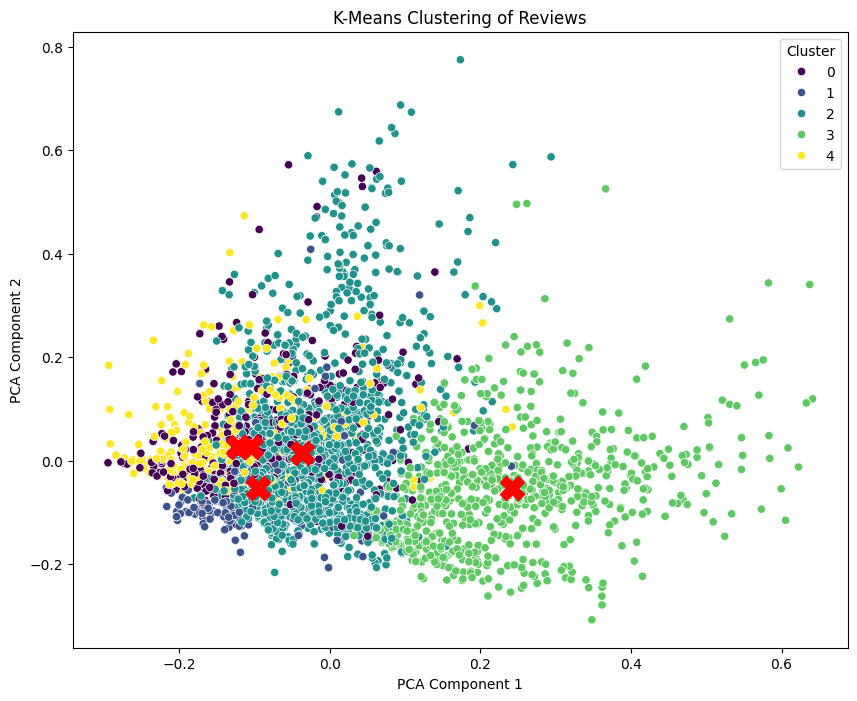

Num GPUs Available:  0


In [98]:
# Preprocess text data (you may already have preprocessed data)
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

train_data['reviews.text'] = train_data['reviews.text'].apply(preprocess_text)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['reviews.text'])

# Perform K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to the original data
train_data['cluster'] = kmeans.labels_

# Visualize clusters using PCA (for dimensionality reduction)
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=train_data['cluster'], palette='viridis')
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering of Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Check GPU availability (optional)
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [101]:
# Display clusters and sample reviews from each cluster
def list_clusters(data, num_clusters):
    for cluster_num in range(num_clusters):
        print(f"\nCluster {cluster_num}:")
        cluster_reviews = data[data['cluster'] == cluster_num]['reviews.text'].head(10)  # Adjust to show more or fewer reviews
        for i, review in enumerate(cluster_reviews, start=1):
            print(f"{i}. {review}")

list_clusters(train_data, num_clusters)


Cluster 0:
1. you will love it you will love it this is a great product light weight i wish it has wifi to download from online
2. love the amazon hd love the amazon hd it replaces my fire kindle love the hd quality
3. so simple and powerful so simple and powerful i was a little hesitant to spend the money to get this but i am so glad i did alexa always answers when i say the commands and i have noticed it is probably right with any command that i have given love the fact that i can see things on the screen some of my news briefings have a picturevideo so thats nice too we also love the video call option planning on getting one for my grandma who is not as technologically advanced and could just sit at a table and talk with the grandkids worth every penny
4. love it love it wanted a tablet that would fit in my purse very easy to use would buy again
5. love it grandkids took to it immediately love it grandkids took to it immediately grand kids love it and it picked up the network in sh

### Conclusion

The EDA revealed several insights:
- The dataset has a class imbalance, with more positive reviews than negative and neutral reviews.
- Most reviews are relatively short.
- Applying SMOTE successfully balanced the class distribution.
- The correlation matrix helped identify important features for sentiment analysis.

These findings will inform the next steps in the sentiment analysis project, including feature selection and model training.
